In [2]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def response(phi, alpha, sig=1.):
    y = phi.matmul(alpha)
    y = y + torch.randn(y.shape)*sig
    return y

In [4]:
def in_term(phi, sig, s_0):
    in_ = phi.t().matmul(phi) + sig * s_0**(-1)
    return in_.pow(-1)

## Setup Data

In [5]:
nx = 70
x = torch.linspace(-1, 1, nx).unsqueeze(-1)
phi = x

alpha = torch.tensor([1., 2.])
sig = 7.
y = x + torch.randn(nx, 1)*0.2

In [6]:
prior_cov = sig

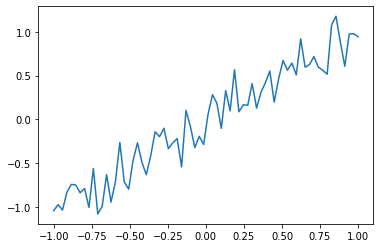

In [7]:
plt.plot(x, y)

### Begin Modeling

In [8]:
inverse_ = in_term(x, 0.2, prior_cov)
post_var = sig * inverse_

In [9]:
post_var

tensor([[0.2912]])

In [10]:
post_mean = inverse_.matmul(x.t().matmul(y))

In [11]:
post_mean

tensor([[1.0195]])

## generate distributions

In [12]:
domain = torch.linspace(-7, 7, 200)

In [13]:
prior_dist = torch.distributions.Normal(loc=0., scale=math.sqrt(sig))
prior_prob = prior_dist.log_prob(domain).exp().squeeze()

In [14]:
post_dist = torch.distributions.Normal(loc=post_mean, scale=torch.sqrt(post_var))
post_prob = post_dist.log_prob(domain).exp().squeeze()

## Plotting

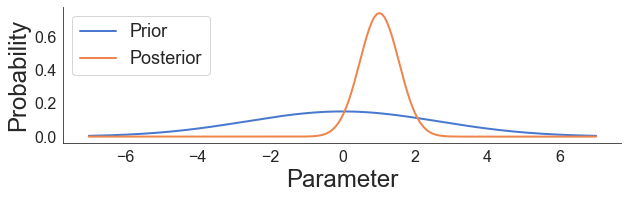

In [15]:
import seaborn as sns
sns.set_style("white")
sns.set_palette("muted")
leg_fs = 18
title_fs = 30
axis_fs = 24
tick_fs = 16

plt.figure(figsize=(10, 2.5))
plt.plot(domain, prior_prob, label="Prior",
        linewidth=2.)
plt.plot(domain, post_prob, label="Posterior",
        linewidth=2.)

plt.legend(loc="upper left", fontsize=leg_fs)
plt.xlabel("Parameter", fontsize=axis_fs)
plt.ylabel("Probability", fontsize=axis_fs)
plt.xticks(fontsize=tick_fs)
plt.yticks(fontsize=tick_fs)
sns.despine()
plt.savefig("./posterior-contraction.pdf", bbox_inches="tight")

## Plot 1D regression

In [16]:
n_lines = 8
prior_samples = prior_dist.sample(sample_shape=torch.Size((n_lines,))).squeeze()
post_samples = post_dist.sample(sample_shape=torch.Size((n_lines,))).squeeze()

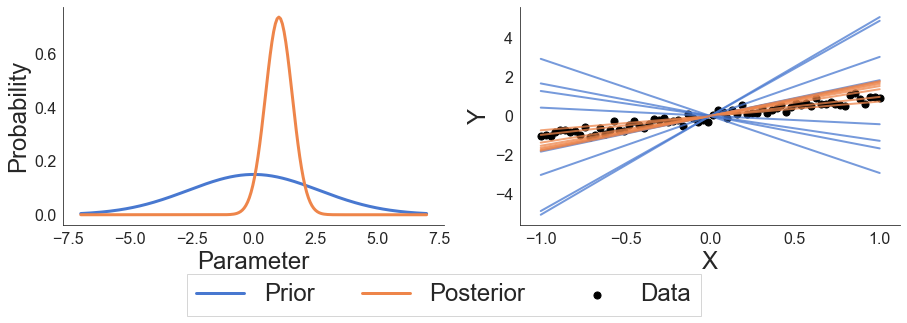

In [23]:

sns.set_style("white")
colors = sns.color_palette("muted")

leg_fs = 24
title_fs = 30
axis_fs = 24
tick_fs = 16

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
l1, = ax1.plot(domain, prior_prob, label="Prior",
        linewidth=3.)
l2, = ax1.plot(domain, post_prob, label="Posterior",
        linewidth=3.)

ax1.set_xlabel("Parameter", fontsize=axis_fs)
ax1.set_ylabel("Probability", fontsize=axis_fs)
ax1.tick_params("both", labelsize=tick_fs)


for ll in range(n_lines):
    ax2.plot(x, x*prior_samples[ll], color=colors[0], alpha=0.75,
            linewidth=2.)
    ax2.plot(x, x*post_samples[ll], color=colors[1], alpha=0.75,
            linewidth=2.)
    
m1 = ax2.scatter(x, y, marker='o', color='k', s=50)
ax2.set_xlabel("X", fontsize=axis_fs)
ax2.set_ylabel("Y", fontsize=axis_fs)
ax2.tick_params("both", labelsize=tick_fs)

ax1.legend(handles = [l1,l2, m1] , labels=["Prior", "Posterior", "Data"],loc='upper center', 
             bbox_to_anchor=(1., -0.17),fancybox=False, shadow=False, ncol=3,
            fontsize=leg_fs)
sns.despine()

plt.savefig("./posterior-contraction.pdf", bbox_inches="tight")